## Final Project Submission

Please fill out:
* Student name: Eleanor Kelman
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:


In [241]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

### <font color = '#044cb3'>The datasets I will be analyzing comes from a CSV file from the National Transportation Safety Board. It comprises civil aviation accident records from 1962-2023.

In [203]:
# import dataset

df = pd.read_csv('data/Aviation_Data.csv')

df.head(3)

/Users/eleanorkelman/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007


In [3]:
# see list of columns

df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

### <font color = '#044cb3'>I've listed below all the columns from the dataframe in plain English, so that we may further hone in on the information of most interest to us.

- event ID
- investigation type
- accident number
- event date
- location
- country
- latitude
- longitude
- airport code
- airport name
- injury severity
- aircraft damage
- aircraft category
- registration number
- make
- model
- amateur-built
- number of engines
- engine type
- FAR description
- schedule
- purpose of flight
- air carrier
- total fatal injuries
- total serious injuries
- total minor injuries
- total uninjured
- weather condition
- broad phase of flight
- report status
- publication date

### <font color = '#044cb3'>Let's randomly select some rows to look at them more closely and see if there is any information that immediately jumps out to us as pertinent.

In [4]:
# for real purposes, you would want to randomize these yourself; I used rng to grab 5 rows
# to examine in-depth

sample_row_1 = df.iloc[40359]
sample_row_2 = df.iloc[89396]
sample_row_3 = df.iloc[24170]
sample_row_4 = df.iloc[81282]
sample_row_5 = df.iloc[10918]

In [5]:
sample_row_1

Event.Id                  20001208X06501
Investigation.Type              Accident
Accident.Number               FTW96LA348
Event.Date                    1996-08-16
Location                    VAN HORN, TX
Country                    United States
Latitude                             NaN
Longitude                            NaN
Airport.Code                         NaN
Airport.Name                         NaN
Injury.Severity                Non-Fatal
Aircraft.damage              Substantial
Aircraft.Category                    NaN
Registration.Number                XBINF
Make                       Vans Aircraft
Model                               RV-4
Amateur.Built                        Yes
Number.of.Engines                      1
Engine.Type                Reciprocating
FAR.Description                      NaN
Schedule                             NaN
Purpose.of.flight               Personal
Air.carrier                          NaN
Total.Fatal.Injuries                   0
Total.Serious.In

### <font color = '#044cb3'>We note that *sample_row_1* is of a tiny (1 engine, 1 passenger) non-fatal crash (1 minor injury) with substantial aircraft damage out of an unrecorded, or no-name, airport. Furthermore, the weather condition is listed as VMC (visual meteorological conditions), meaning the flight was likely not visually strenuous. Furthermore, this is an amateur-built aircraft model and the crash report lists probable cause.

In [6]:
sample_row_2

Event.Id                                       20220622105301
Investigation.Type                                   Accident
Accident.Number                                    ERA22LA277
Event.Date                                         2022-06-20
Location                                       Wilmington, NC
Country                                         United States
Latitude                                              334611N
Longitude                                            0772920W
Airport.Code                                              NaN
Airport.Name                                              NaN
Injury.Severity                                       Serious
Aircraft.damage                                   Substantial
Aircraft.Category                                    Airplane
Registration.Number                                    N337AX
Make                                      Hawker Aircraft Ltd
Model                                           Hawker Hunter
Amateur.

### <font color = '#044cb3'>We note that *sample_row_2* is of a tiny (1 engine, 1 passenger) serious crash (1 minor injury) with substantial aircraft damage out of an unrecorded, or no-name, airport. Furthermore, the weather condition is listed as VMC (visual meteorological conditions), meaning the flight was likely not visually strenuous. Furthermore, this is not an amateur-built aircraft model and there is no report status.

In [7]:
sample_row_3

Event.Id                    20001213X29391
Investigation.Type                Accident
Accident.Number                LAX89DUM04B
Event.Date                      1989-09-30
Location                      EL CAJON, CA
Country                      United States
Latitude                               NaN
Longitude                              NaN
Airport.Code                           SEE
Airport.Name               GILLESPIE FIELD
Injury.Severity                  Non-Fatal
Aircraft.damage                Substantial
Aircraft.Category                      NaN
Registration.Number                 N711MH
Make                      Stolp Starduster
Model                                SA300
Amateur.Built                          Yes
Number.of.Engines                        1
Engine.Type                  Reciprocating
FAR.Description                        NaN
Schedule                               NaN
Purpose.of.flight                 Personal
Air.carrier                            NaN
Total.Fatal

### <font color = '#044cb3'>We note that *sample_row_3* is of a small (1 engine, 3 passenger) non-fatal crash (3 uninjured) with substantial aircraft damage out of Gillespie Field airport (a small airport in California [https://www.sandiegocounty.gov/content/sdc/dpw/airports/gillespie.html]). Furthermore, the weather condition is listed as VMC (visual meteorological conditions), meaning the flight was likely not visually strenuous. Furthermore, this is an amateur-built aircraft model and the crash report lists probable cause.

In [8]:
sample_row_4

Event.Id                                                     20170924X10820
Investigation.Type                                                 Accident
Accident.Number                                                  ERA17LA334
Event.Date                                                       2017-09-24
Location                                                     Darlington, SC
Country                                                       United States
Latitude                                                            034253N
Longitude                                                          0795553W
Airport.Code                                                            PVT
Airport.Name                                                           NONE
Injury.Severity                                                   Non-Fatal
Aircraft.damage                                                 Substantial
Aircraft.Category                                                  Airplane
Registration

### <font color = '#044cb3'>We note that *sample_row_4* is of a tiny (1 engine, 1 passenger) non-fatal crash (1 minor injury) with substantial aircraft damage out of a privately-owned airport. Furthermore, the weather condition is listed as VMC (visual meteorological conditions), meaning the flight was likely not visually strenuous. Furthermore, this is an amateur-built aircraft model and the crash was due to fuel starvation from a clogged fuel filter.

In [9]:
sample_row_5

Event.Id                   20001214X35661
Investigation.Type               Accident
Accident.Number                CHI85LA116
Event.Date                     1985-02-20
Location                      PONTIAC, MI
Country                     United States
Latitude                              NaN
Longitude                             NaN
Airport.Code                          PTK
Airport.Name              OAKLAND-PONTIAC
Injury.Severity                 Non-Fatal
Aircraft.damage               Substantial
Aircraft.Category                     NaN
Registration.Number                N6450K
Make                               Cessna
Model                                 172
Amateur.Built                          No
Number.of.Engines                       1
Engine.Type                 Reciprocating
FAR.Description                       NaN
Schedule                              NaN
Purpose.of.flight           Instructional
Air.carrier                           NaN
Total.Fatal.Injuries              

### <font color = '#044cb3'>We note that *sample_row_5* is of a tiny (1 engine, 1 passenger) non-fatal crash (1 uninjured) with substantial aircraft damage out of Oakland County International Airport (a mid-sized airport in Michigan [https://www.oakgov.com/community/airports/oakland-county-international-airport]). Furthermore, the weather condition is listed as VMC (visual meteorological conditions), meaning the flight was likely not visually strenuous. Furthermore, this is not an amateur-built aircraft model and the crash report lists probable cause.

### <font color = '#044cb3'> Entirely based on the samples (which are only a few out of many, many rows), we can narrow down our conclusions to certain rows. To start, let's see if there exists a large discrepancy between the number of amateur and professional crashed aircrafts.

In [204]:
# aggregate data by Amateur.Built column

total_builds = df['Amateur.Built'].value_counts()

# check if there are any non-Boolean columns to ensure comprehensive agreggation

sum(total_builds) == df['Amateur.Built'].count()

True

In [205]:
df_amateur = df[df['Amateur.Built'] == 'No']

df_prof = df[df['Amateur.Built'] == 'Yes']

In [206]:
# break up data into amateur and professional builds

builds_amateur = total_builds['Yes']

builds_prof = total_builds['No']

In [207]:
# calculate percentage of amateur and professional builds

percent_amateur = (builds_amateur / sum(total_builds)) * 100

percent_prof = (builds_prof / sum(total_builds)) * 100

print(f"The percentage of amateur builds is {percent_amateur}%.")

print(f"The percentage of professional builds is {percent_prof}%.")

The percentage of amateur builds is 9.545316318830459%.
The percentage of professional builds is 90.45468368116954%.


### <font color = '#044cb3'>There are far more professional builds listed, but we cannot necessarily glean information from this. However, we could hypothesize that a professional plane, by nature of flying higher, at faster speeds, and with more engines, could lead to a more severe crash. Let's break down these builds into the severity of the crashes.

In [42]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [208]:
df['Injury.Severity'].value_counts()

Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(80)         1
Fatal(31)         1
Fatal(132)        1
Fatal(228)        1
Fatal(144)        1
Name: Injury.Severity, Length: 109, dtype: int64

### <font color = '#044cb3'>Looking at the injury severities, there appear to be a lot of names to mean the same thing (for example, the values of *Fatal*, *Fatal(1)*, and *Fatal(228)* all refer to deadly crashes). Let's start by cleaning up this data so that there are only a few specific injury types.

In [209]:
# clean up list of fatal crashes to retrieve all rows

fatal_rows = ['Fatal']

unique_values = set(list(df['Injury.Severity']))

for value in unique_values:
    if type(value) == str:
        if value != 'Non-Fatal' and 'Fatal' in value:
            fatal_rows.append(value)

In [210]:
df['Injury.Severity'] = df['Injury.Severity'].apply(lambda value: "Fatal" if value in fatal_rows else value)

In [211]:
df['Injury.Severity'].value_counts()

Non-Fatal      67357
Fatal          17826
Incident        2219
Minor            218
Serious          173
Unavailable       96
Name: Injury.Severity, dtype: int64

### <font color = '#044cb3'>Now let's tally up the fatal/serious injuries in comparison to the total number incidents, being sure to consider these in terms of amateur and professional crafts.

In [212]:
total_amateur_fatal = df_amateur[df_amateur['Injury.Severity'] == 'Fatal']['Event.Id'].count()

total_prof_fatal = df_prof[df_prof['Injury.Severity'] == 'Fatal']['Event.Id'].count()

In [213]:
percent_amateur_fatal = (total_amateur_fatal / df_amateur['Injury.Severity'].count()) * 100

percent_prof_fatal = (total_prof_fatal / df_prof['Injury.Severity'].count()) * 100

print(f"The percentage of fatal amateur crashes is {percent_amateur_fatal}.")

print("")

print(f"The percentage of fatal professional crashes is {percent_prof_fatal}.")

The percentage of fatal amateur crashes is 5.7481119110360215.

The percentage of fatal professional crashes is 8.295964125560538.


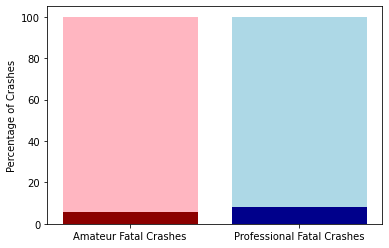

In [244]:
fig, ax = plt.subplots()

ax.bar("Amateur Fatal Crashes", percent_amateur_fatal, color = 'darkred')
ax.bar("Amateur Fatal Crashes", [100 - percent_amateur_fatal], bottom = percent_amateur_fatal, color = 'lightpink')

ax.bar("Professional Fatal Crashes", percent_prof_fatal, color = 'darkblue')
ax.bar("Professional Fatal Crashes", [100 - percent_prof_fatal], bottom = percent_prof_fatal, color = 'lightblue')

ax.set_ylabel("Percentage of Crashes")

plt.show()

### <font color = '#044cb3'>Although the difference is slight, there does exist a smaller percentage of amateur crashes that are fatal than there does professional crashes. There could be many factors to affect this. Most likely, the higher flight altitude, speed, longer flight duration, and sheer size of these professional flights is what is causing the crashes to be slightly more fatal than those of the amateur flights.

### <font color = '#044cb3'>Therefore, I would recommend to anyone hoping to reduce the number of deadly plane crashes under their watch to choose a more amateur build as opposed to a professional build. This being said, however, the difference in percentages isn't super significant, and there could be benefits to a professional flight that could not be found in a smaller, more personal plane. Additionally, this does not consider the severity of non-fatal crashes, which would be something to keep in mind.